# View data

## KOS data

In [16]:
vocabulary = []
with open("data/bag+of+words/vocab.kos.txt", "r") as f:
    for line in f:
        vocabulary.append(line.strip("\n"))

len(vocabulary)

6906

In [17]:
vocabulary

['aarp',
 'abandon',
 'abandoned',
 'abandoning',
 'abb',
 'abc',
 'abcs',
 'abdullah',
 'ability',
 'aboard',
 'abortion',
 'abortions',
 'abraham',
 'abrams',
 'abroad',
 'absence',
 'absent',
 'absentee',
 'absolute',
 'absolutely',
 'abstain',
 'absurd',
 'abu',
 'abuse',
 'abuses',
 'academy',
 'accent',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accident',
 'accidentally',
 'accidents',
 'accomplish',
 'accomplished',
 'accomplishment',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'accurately',
 'accusations',
 'accused',
 'accusing',
 'achieve',
 'achieved',
 'achievements',
 'acknowledge',
 'acknowledged',
 'aclu',
 'act',
 'actblue',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'actively',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actor',
 'acts',
 'actual',
 'adam',
 'adams',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',


In [18]:
import numpy as np

with open("data/bag+of+words/docword.kos.txt", "r") as f:
    n_docs = int(f.readline().strip())
    n_words = int(f.readline().strip())
    n_nonzero_counts = int(f.readline().strip())
    print(n_docs, n_words, n_nonzero_counts)
    counts_matrix = np.zeros((n_docs, n_words))
    for line in f:
        split_line = line.strip().split(" ")
        counts_matrix[int(split_line[0])-1,
                      int(split_line[1])-1] = int(split_line[2])

3430 6906 353160


In [19]:
counts_matrix

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfdidf_transformer = TfidfTransformer()

In [21]:
tf_idf_matrix = tfdidf_transformer.fit_transform(counts_matrix)

In [22]:
tf_idf_matrix

<3430x6906 sparse matrix of type '<class 'numpy.float64'>'
	with 353160 stored elements in Compressed Sparse Row format>

## Dimension Reduction

In [23]:
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap, MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
def reduce_dim(reducer, data):
    reduced_matrix = reducer.fit_transform(data)
    display(reduced_matrix)
    plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1])    


In [25]:
reduce_dim(PCA(n_components=2, svd_solver="arpack"), tf_idf_matrix)

TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

/home/mirek/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-30.195904 ,  20.306572 ],
       [ -1.1211499,  37.057186 ],
       [ -8.121862 , -50.02616  ],
       ...,
       [  2.287626 , -28.443727 ],
       [  1.624952 , -29.38033  ],
       [  1.4746101, -29.632917 ]], dtype=float32)

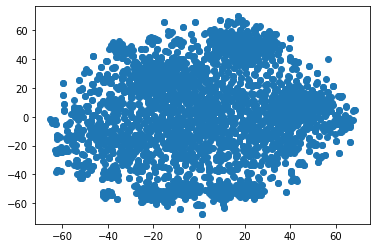

In [26]:
reduce_dim(TSNE(n_components=2, init="random"), tf_idf_matrix)

array([[-0.00675825,  0.00100346],
       [-0.00578157, -0.00066634],
       [-0.01975481, -0.01235118],
       ...,
       [ 0.00408722, -0.0019013 ],
       [-0.00352008, -0.00299249],
       [-0.00336973,  0.00092813]])

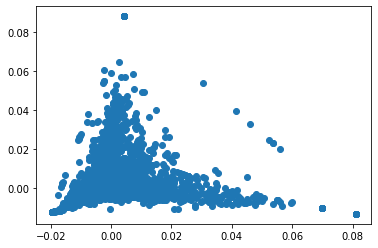

In [27]:
reduce_dim(LocallyLinearEmbedding(n_components=2), np.asarray(tf_idf_matrix.todense()))

array([[-0.41110421, -0.88425209],
       [-0.89309894, -1.33234077],
       [-1.28100256, -0.66049754],
       ...,
       [-0.07967226, -0.4278284 ],
       [-0.80182101, -1.20461064],
       [-0.71802955, -0.25838548]])

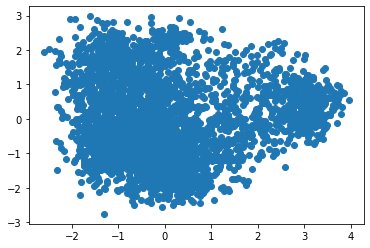

In [29]:
reduce_dim(Isomap(n_components=2), tf_idf_matrix)

array([[-0.44907949,  0.09712167],
       [-0.46957373,  0.15120606],
       [-1.05140648,  1.1707141 ],
       ...,
       [ 0.17443464, -0.12798909],
       [-0.44592501,  1.48955839],
       [-0.93666236,  1.158799  ]])

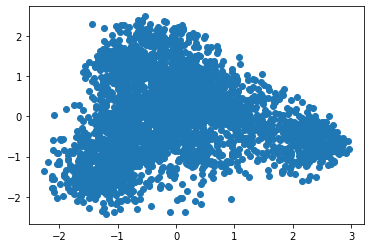

In [28]:
reduce_dim(Isomap(n_components=2, n_neighbors=10), tf_idf_matrix)